# Machine Learning Zoomcamp, cohort 2024
# HW2 / Arcangela Arnone Cohen

# https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/refs/heads/master/cohorts/2024/02-regression/homework.md
## Homework

# Note: sometimes your answer doesn't match one of 
# the options exactly. That's fine. 
# Select the option that's closest to your solution.

### Dataset

# In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

# Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

#
# wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
#

# The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

In [5]:
import pandas as pd
import numpy as np

In [7]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
df = pd.read_csv(url)

### Preparing the dataset

# First, we'll normalize the names of the columns:
# python    df.columns = df.columns.str.lower().str.replace(' ', '_')

# Now, instead of `'Final Price'`, we have `'final_price'`.

# Next, use only the following columns:

# * `'ram'`,
# * `'storage'`,
# * `'screen'`,
# * `'final_price'`

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
 df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [13]:
df2 = df.loc[ : ,[ 'ram', 'storage','screen','final_price'] ]

In [15]:
df2

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [ ]:
### EDA

# Look at the `final_price` variable. Does it have a long tail? 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

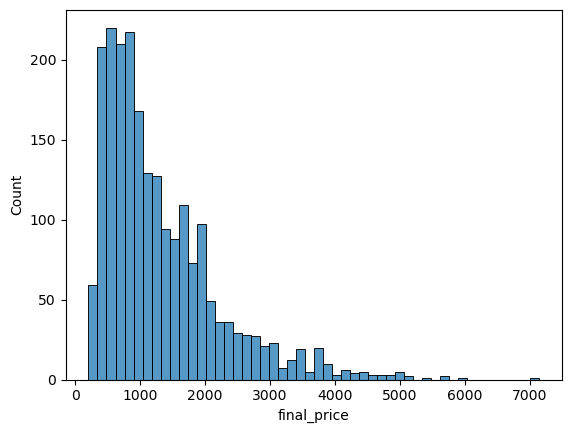

In [21]:
sns.histplot(df2.final_price, bins=50)

In [ ]:
#  My answer: Yes, final_price has a long tail

In [ ]:
### Question 1

# There's one column with missing values. What is it?

# `'ram'`
# `'storage'`
# `'screen'`
# `'final_price'`

In [24]:
df2.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [ ]:
#  My answer: 'screen' column is the answer

In [ ]:
### Question 2

# What's the median (50% percentile) for variable `'ram'`?

#- 8
#- 16
#- 24
#- 32

In [26]:
df2.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [28]:
# It's 16.  I will run again the calc, calling only the column
ram_median = df2['ram'].median()
print("The median of variable 'ram' is: ", ram_median)

The median of variable 'ram' is:  16.0


In [ ]:
### Prepare and split the dataset

# * Shuffle the dataset (the filtered one you created above), use seed `42`.
# * Split your data in train/val/test sets, with 60%/20%/20% distribution.

# Use the same code as in the lectures

In [30]:
for col in df2.columns:
    print(col)
    print(df[col].unique()[:5])
    print()

ram
[ 8 16 32 12  4]

storage
[ 512  256 1000   64  128]

screen
[15.6 17.3 14.  16.1 13.3]

final_price
[1009.    299.    789.   1199.    669.01]



In [ ]:
# Prepare and split

In [32]:
n = len(df2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [62]:
n_val, n_test, n_train

(432, 432, 1296)

In [38]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [40]:
df_train = df2.iloc[idx[:n_train]]
df_val = df2.iloc[idx[n_train:n_train+n_val]]
df_test = df2.iloc[idx[n_train+n_val:]]

In [68]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [42]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [74]:
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [ ]:
### Question 3

# * We need to deal with missing values for the column from Q1.
# * We have two options: fill it with 0 or with the mean of this variable.
# * Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# * For computing the mean, use the training only!
# * Use the validation dataset to evaluate the models and compare the RMSE of each option.
# * Round the RMSE scores to 2 decimal digits using `round(score, 2)`
# * Which option gives better RMSE?

# Options:

# - With 0
# - With mean
# - Both are equally good

In [ ]:
# Where are the null values: df_train, df_val or df_test?

In [46]:
df_train.isnull().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

In [48]:
df_val.isnull().sum()

ram            0
storage        0
screen         1
final_price    0
dtype: int64

In [50]:
df_test.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [ ]:
# Three values are in df_train and one is located in df_val. I will work with deep copy

In [52]:
# Creatng the data sets (train and val) to be filled with 0
df_train0 = df_train.copy()
df_val0 = df_val.copy()

In [54]:
df_train0.isnull().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

In [58]:
df_train0 = df_train0.fillna(0)

In [60]:
df_train0.describe()

,ram,storage,screen,final_price
count,1296.000000,1296.000000,1296.000000,1296.000000
mean,15.666667,599.101852,15.128434,1333.702894
std,10.449954,378.525384,1.431476,937.752439
min,4.000000,32.000000,0.000000,201.050000
25%,8.000000,256.000000,14.000000,670.805000
50%,16.000000,512.000000,15.600000,1042.120000
75%,16.000000,1000.000000,15.600000,1734.367500
max,128.000000,4000.000000,18.000000,5999.000000


In [64]:
df_val0.isnull().sum()

ram            0
storage        0
screen         1
final_price    0
dtype: int64

In [66]:
df_val0 = df_val0.fillna(0)
df_val0.describe()

,ram,storage,screen,final_price
count,432.000000,432.000000,432.000000,432.000000
mean,14.814815,577.462963,15.114815,1278.445162
std,8.603834,316.621270,1.355238,904.767100
min,4.000000,32.000000,0.000000,230.140000
25%,8.000000,256.000000,14.000000,644.777500
50%,16.000000,512.000000,15.600000,999.000000
75%,16.000000,1000.000000,15.600000,1651.497500
max,64.000000,2000.000000,17.300000,7150.470000


In [68]:
df_val0.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [ ]:
# At this point are ready the data sets filled with 0, now I will prepare the datasets with the mean, first I will calculate the mean

In [74]:
tmean = df_train['screen'].mean()

In [76]:
tmean

15.163534416086618

In [78]:
# Creatng the data sets (train and val) to be filled with the mean
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()

In [80]:
df_train_mean.isnull().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

In [82]:
df_train_mean.describe()

,ram,storage,screen,final_price
count,1296.000000,1296.000000,1293.000000,1296.000000
mean,15.666667,599.101852,15.163534,1333.702894
std,10.449954,378.525384,1.233377,937.752439
min,4.000000,32.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,670.805000
50%,16.000000,512.000000,15.600000,1042.120000
75%,16.000000,1000.000000,15.600000,1734.367500
max,128.000000,4000.000000,18.000000,5999.000000


In [84]:
df_train_mean = df_train_mean.fillna(tmean)

In [86]:
df_train_mean.describe()

,ram,storage,screen,final_price
count,1296.000000,1296.000000,1296.000000,1296.000000
mean,15.666667,599.101852,15.163534,1333.702894
std,10.449954,378.525384,1.231947,937.752439
min,4.000000,32.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,670.805000
50%,16.000000,512.000000,15.600000,1042.120000
75%,16.000000,1000.000000,15.600000,1734.367500
max,128.000000,4000.000000,18.000000,5999.000000


In [88]:
df_train_mean.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [90]:
df_val_mean = df_val_mean.fillna(tmean)

In [92]:
df_val_mean.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [ ]:
# Now,I'm going to update the y vectors, using each data set without null values and applying and logarithm.  I'll create a y vector from each data
# frame filled with zero and another from the set filled with the mean, then I'll delete the final_price column from each model and the I will apply
# the regression.
#  df_test is the same for both cases
#  Dataframes created until this moment: df_train0 and df_val0 (deep copy from df_train, filled null values with 0)   y_train0, y_val0, y_test0
#  Dataframes created until this moment: df_train_mean and df_val_mean (deep copy from df_train, filled null values with the mean)  y_train_mean, ....

In [94]:
np.log1p(df_train0.final_price.values)

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [96]:
y_train0 = np.log1p(df_train0.final_price.values)
y_val0 = np.log1p(df_val0.final_price.values)
y_test0 = np.log1p(df_test.final_price.values)

In [104]:
y_train0

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [114]:
np.expm1(7.024907)

1123.289995173466

In [106]:
del df_train0['final_price']
del df_val0['final_price']

In [108]:
y_train_mean = np.log1p(df_train_mean.final_price.values)
y_val_mean = np.log1p(df_val_mean.final_price.values)
y_test_mean = np.log1p(df_test.final_price.values)

In [112]:
del df_train_mean['final_price']
del df_val_mean['final_price']
del df_test['final_price']

In [ ]:
#  df_test is the same for both cases
#  df_train0 and df_val0 (deep copy from df_train, filled null values with 0)   y_train0, y_val0, y_test0
#  df_train_mean and df_val_mean (deep copy from df_train, filled null values with the mean)  y_train_mean, y_val_mean, y_test_mean

In [ ]:
# linear regression

In [116]:
df_train0.iloc[10]

ram         16.0
storage    512.0
screen      15.6
Name: 10, dtype: float64

In [118]:
# Copied from class  - Dot product and linear regression vector form
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [120]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [122]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [124]:
w_new = [w0] + w

In [126]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [128]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [130]:
def linear_regression(X):
    return X.dot(w_new)

In [ ]:
# Training a linear regression model

In [134]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [140]:
w0_0, w_0 = train_linear_regression(df_train0, y_train0)
y_pred0 = w0_0 + df_train0.dot(w_0)
w0_0

6.7271637061124805

In [142]:
w0_mean, w_mean = train_linear_regression(df_train_mean, y_train_mean)
y_pred_mean = w0_mean + df_train_mean.dot(w_mean)
w0_mean

6.855566544134296

In [ ]:
# CODE FROM LESSONS LECTURES
# w0, w = train_linear_regression(X_train, y_train)
# y_pred = w0 + X_train.dot(w)
# w0

In [144]:
# RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [146]:
# RMSE for model filled with zeros 
rmse(y_train0, y_pred0)

0.44632651855038796

In [150]:
# RMSE for model filled with mean 
rmse(y_train_mean, y_pred_mean)

0.4460856669097625

In [ ]:
# My answer is both are good

In [ ]:
# CODE FROM LESSONS LECTURES
# def rmse(y, y_pred):
#    se = (y - y_pred) ** 2
#    mse = se.mean()
#    return np.sqrt(mse)
#  rmse(y_train, y_pred)

In [ ]:
### Question 4

# * Now let's train a regularized linear regression.
# * For this question, fill the NAs with 0. 
# * Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
# * Use RMSE to evaluate the model on the validation dataset.
# * Round the RMSE scores to 2 decimal digits.
# * Which `r` gives the best RMSE?

# If there are multiple options, select the smallest `r`.

# Options:

# - 0
# - 0.01
# - 1
# - 10
# - 100

In [ ]:
#  I will start again with the original model, eliminate spaces and NANs, all with lowercase, split with seed 42, train, val, test 
# then I will regularize it, then train

In [152]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [154]:
# Creat a deep copy
df_new = df.copy()

In [156]:
df_new

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [ ]:
# All the titles are in lowercase, the following line is not neccesary

# df.columns = df.columns.str.lower().str.replace(' ', '_')

# I will put all the data in lowercase and delete spaces

In [158]:
strings = list(df_new.dtypes[df_new.dtypes == 'object'].index)
strings

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [164]:
for col in strings:
    df_new[col] = df_new[col].str.lower().str.replace(' ', '_')

In [166]:
df_new

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,NaN,13.4,yes,1899.99


In [168]:
df_new.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [170]:
df_new = df_new.fillna(0)

In [172]:
df_new.isnull().sum()

laptop          0
status          0
brand           0
model           0
cpu             0
ram             0
storage         0
storage_type    0
gpu             0
screen          0
touch           0
final_price     0
dtype: int64

In [174]:
df_new

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,0,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,0,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,0,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,0,15.6,no,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,0,13.4,yes,1899.99


In [176]:
# Split
n = len(df_new)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [214]:
df2_train = df_new.iloc[idx[:n_train]]
df2_val = df_new.iloc[idx[n_train:n_train+n_val]]
df2_test = df_new.iloc[idx[n_train+n_val:]]

In [216]:
len(df2_train), len(df2_val), len(df2_test)

(1296, 432, 432)

In [218]:
df2_train = df2_train.reset_index(drop=True)
df2_val = df2_val.reset_index(drop=True)
df2_test = df2_test.reset_index(drop=True)

In [220]:
y_train = np.log1p(df2_train.final_price.values)
y_val = np.log1p(df2_val.final_price.values)
y_test = np.log1p(df2_test.final_price.values)

In [186]:
X_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [196]:
df_new

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,0,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,0,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,0,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,0,15.6,no,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,0,13.4,yes,1899.99


In [198]:
X_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,0,14.1,no,201.05
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,0,13.3,no,1016.00
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,asus_p1411cja-bv377r_intel_core_i5-1035g1/8gb/...,refurbished,asus,p1411,intel_core_i5,8,256,ssd,0,14.0,no,549.00
1292,msi_prestige_16_studio_a13ve-045xes_intel_core...,new,msi,prestige,intel_core_i7,32,1000,ssd,rtx_4050,16.0,no,1999.00
1293,lenovo_ideapad_gaming_3_15iah7_intel_core_i5-1...,new,lenovo,ideapad,intel_core_i5,16,512,ssd,rtx_3050,15.6,no,1059.00
1294,lenovo_yoga_7_14itl5_intel_evo_core_i7-1165g7/...,new,lenovo,yoga,intel_evo_core_i7,16,512,ssd,0,14.0,yes,1671.00


In [224]:
del df2_train['final_price']
del df2_val['final_price']
del df2_test['final_price']

In [226]:
df2_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,0,14.1,no
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,0,13.3,no
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no
...,...,...,...,...,...,...,...,...,...,...,...
1291,asus_p1411cja-bv377r_intel_core_i5-1035g1/8gb/...,refurbished,asus,p1411,intel_core_i5,8,256,ssd,0,14.0,no
1292,msi_prestige_16_studio_a13ve-045xes_intel_core...,new,msi,prestige,intel_core_i7,32,1000,ssd,rtx_4050,16.0,no
1293,lenovo_ideapad_gaming_3_15iah7_intel_core_i5-1...,new,lenovo,ideapad,intel_core_i5,16,512,ssd,rtx_3050,15.6,no
1294,lenovo_yoga_7_14itl5_intel_evo_core_i7-1165g7/...,new,lenovo,yoga,intel_evo_core_i7,16,512,ssd,0,14.0,yes


In [ ]:
# At this point I am ready for the next step

In [206]:
df_new.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [208]:
df_new.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [210]:
base = ['ram',  'storage', 'screen']

In [212]:
df_new[base]

,ram,storage,screen
0,8,512,15.6
1,8,256,15.6
2,8,256,15.6
3,16,1000,15.6
4,16,512,15.6
...,...,...,...
2155,16,1000,17.3
2156,16,1000,17.3
2157,32,1000,17.3
2158,16,1000,13.4


In [228]:
df2_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,0,14.1,no
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,0,13.3,no
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no
...,...,...,...,...,...,...,...,...,...,...,...
1291,asus_p1411cja-bv377r_intel_core_i5-1035g1/8gb/...,refurbished,asus,p1411,intel_core_i5,8,256,ssd,0,14.0,no
1292,msi_prestige_16_studio_a13ve-045xes_intel_core...,new,msi,prestige,intel_core_i7,32,1000,ssd,rtx_4050,16.0,no
1293,lenovo_ideapad_gaming_3_15iah7_intel_core_i5-1...,new,lenovo,ideapad,intel_core_i5,16,512,ssd,rtx_3050,15.6,no
1294,lenovo_yoga_7_14itl5_intel_evo_core_i7-1165g7/...,new,lenovo,yoga,intel_evo_core_i7,16,512,ssd,0,14.0,yes


In [230]:
base

['ram', 'storage', 'screen']

In [232]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [234]:
for col in df2_train.columns:
    print(col)
    print(df[col].unique()[:5])
    print()

laptop
['asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"'
 'alurin_go_start_intel_celeron_n4020/8gb/256gb_ssd/15.6"'
 'asus_expertbook_b1_b1502cba-ej0424x_intel_core_i3-1215u/8gb/256gb_ssd/15.6"'
 'msi_katana_gf66_12uc-082xes_intel_core_i7-12700h/16gb/1tb_ssd/rtx3050/15.6"'
 'hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb_ssd/15.6"']

status
['new' 'refurbished']

brand
['asus' 'alurin' 'msi' 'hp' 'lenovo']

model
['expertbook' 'go' 'katana' '15s' 'crosshair']

cpu
['intel_core_i5' 'intel_celeron' 'intel_core_i3' 'intel_core_i7'
 'amd_ryzen_5']

ram
[ 8 16 32 12  4]

storage
[ 512  256 1000   64  128]

storage_type
['ssd' 'emmc' nan]

gpu
[nan 'rtx_3050' 'rtx_4060' 'rtx_4050' 'rtx_3060']

screen
[15.6 17.3 14.  16.1 13.3]

touch
['no' 'yes']



In [286]:
categorical_columns = [
   'laptop', 'status', 'brand', 'model', 'cpu',
   'storage_type', 'gpu', 'touch' ]

In [288]:
categorical = {}

for c in categorical_columns:
    categorical[c] = list(df2_train[c].value_counts().head().index)

In [278]:
df2_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,0,14.1,no
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,0,13.3,no
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no
...,...,...,...,...,...,...,...,...,...,...,...
1291,asus_p1411cja-bv377r_intel_core_i5-1035g1/8gb/...,refurbished,asus,p1411,intel_core_i5,8,256,ssd,0,14.0,no
1292,msi_prestige_16_studio_a13ve-045xes_intel_core...,new,msi,prestige,intel_core_i7,32,1000,ssd,rtx_4050,16.0,no
1293,lenovo_ideapad_gaming_3_15iah7_intel_core_i5-1...,new,lenovo,ideapad,intel_core_i5,16,512,ssd,rtx_3050,15.6,no
1294,lenovo_yoga_7_14itl5_intel_evo_core_i7-1165g7/...,new,lenovo,yoga,intel_evo_core_i7,16,512,ssd,0,14.0,yes


In [290]:
categorical

{'laptop': ['msi_modern_15_a11sbu-620xes_intel_core_i7-1165g7/32gb/1tb_ssd/mx450/15.6"',
  'dell_latitude_e5470_intel_core_i5-6300u/8gb/240gb_ssd/14"',
  'msi_raider_ge78hx_13vi-063es_intel_core_i9-13980hx/64gb/2tb_ssd/rtx_4090/17"',
  'asus_rog_zephyrus_g15_ga502iv-hn024_amd_ryzen_7_4800hs_apu/16gb/1tb_ssd/rtx2060/15.6"',
  'hp_victus_15-fa0026ns_intel_core_i5-12450h/16gb/512gb_ssd/gtx_1650/15.6"'],
 'status': ['new', 'refurbished'],
 'brand': ['asus', 'lenovo', 'hp', 'msi', 'acer'],
 'model': ['vivobook', 'rog', 'thinkpad', '15s', 'ideapad'],
 'cpu': ['intel_core_i7',
  'intel_core_i5',
  'amd_ryzen_7',
  'amd_ryzen_5',
  'intel_core_i3'],
 'storage_type': ['ssd', 'emmc', 0],
 'gpu': [0, 'rtx_3050', 'rtx_3060', 'rtx_3070', 'rtx_4060'],
 'touch': ['no', 'yes']}

In [292]:
def prepare_X(df):
    df = df.copy()
    features = base
  #  df_num = df[base]
    
#    df['age'] = 2017 - df['year']
#    features = base + ['age']

#    for v in [2, 3, 4]:
#        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
#        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [294]:
X_train = prepare_X(df2_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df2_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

LinAlgError: Singular matrix

In [304]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

 #   XTX_inv = np.linalg.inv(XTX)
    w_full = XTX.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [306]:
X_train = prepare_X(df2_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

KeyError: 'laptop'

In [ ]:
-- Review the price

In [ ]:
### Question 5 

# * We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# * Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
# * For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# * Fill the missing values with 0 and train a model without regularization.
# * For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
# * What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
# * Round the result to 3 decimal digits (`round(std, 3)`)

# What's the value of std?

# - 19.176
# - 29.176
# - 39.176
# - 49.176

# > Note: Standard deviation shows how different the values are.
# > If it's low, then all values are approximately the same.
# > If it's high, the values are different. 
# > If standard deviation of scores is low, then our model is *stable*.


In [ ]:
### Question 6

# * Split the dataset like previously, use seed 9.
# * Combine train and validation datasets.
# * Fill the missing values with 0 and train a model with `r=0.001`. 
# * What's the RMSE on the test dataset?

# Options:

# - 598.60
# - 608.60
# - 618.60
# - 628.60

In [ ]:
## Submit the results

# * Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw02
# * If your answer doesn't match options exactly, select the closest one